# PROJECT 3 - HEALTHCARE - PREDICTIVE ANALYSIS

## PROBLEM STATEMENT
- Heart disease is a leading cause of mortality worldwide. 
- Early detection and accurate prediction of heart disease can significantly improve patient outcomes by enabling timely intervention and preventive measures.
## RESEARCH OBJECTIVE
The objective of this project is to develop a machine learning model that can effectively predict (based on various medical and lifestyle factors) whether:
- 1 = The person has heart disease.
- 0 = The person does not have heart disease


## DATA UNDERSTANDING AND PREPARATION

### 1. Import Libraries

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Load dataset

In [2]:
# Load the dataset
data = pd.read_csv('cardio_data.csv')
data.head(10)

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0
5,21-12-2021,Indonesia,8,0,21914,0,120,80,2,1,2,151,Teacher,0,67.0,0
6,08-01-2021,Malaysia,9,1,22113,0,130,80,3,1,1,157,Architect,0,93.0,0
7,19-08-2022,Malaysia,12,1,22584,0,130,90,3,2,3,178,Chef,0,95.0,1
8,09-11-2020,India,13,1,17668,0,110,70,1,1,1,158,Lawyer,0,71.0,0
9,28-04-2022,Malaysia,14,0,19834,0,110,60,1,1,1,164,Accountant,0,68.0,0


### 3. Check data structure

In [3]:
# Check data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


##### DATASET OVERVIEW:
- date: Date of record entry
- country: Country of individual (e.g., Indonesia, Malaysia, Singapore).
- id: Unique identifier for individuals.
- active: Physical activity status (binary: 0 or 1).
- age: Age in days.
- alco: Alcohol consumption (binary: 0 or 1).
- ap_hi and ap_lo: Blood pressure readings (systolic and diastolic).
- cholesterol: Cholesterol levels (1: normal, 2: above normal, 3: well above normal).
- gender: Gender of the individual (1: female, 2: male).
- gluc: Glucose levels (1: normal, 2: above normal, 3: well above normal).
- height and weight: Anthropometric data.
- occupation: Job titles, indicating socioeconomic status or lifestyle implications.
- smoke: Smoking status (binary: 0 or 1).
- disease: Presence of cardiovascular disease (target variable, binary: 0 or 1).

##### INITIAL OBSERVATIONS
- Target Variable: The disease column will be the focus of predictive analysis.
- Demographics: Includes country, gender, and occupation, which could be critical for understanding population-specific patterns.
- Health Indicators: Blood pressure, cholesterol, glucose levels, and lifestyle factors (e.g., activity, smoking, alcohol consumption) provide key predictive features.
- Data Quality: Columns like date and age in days need preprocessing for analysis. Also, categorical variables (e.g., country, occupation, gender) will require encoding.

### 4. Explore the data

#### A. Data Understanding, Preparation and EDA (Exploratory Data Analysis):

- Statistical Summary
- Identify missing or inconsistent data.
- Gender encoding
- Check for duplicates
- Analyze the distribution of each feature and the target variable.
- Visualize correlations and check for outliers.
- Handle categorical and date variables.
- Key comparisons: disease prevalence by cholesterol snd disease prevalence by smoking status

In [4]:
# Statistical Summary
data.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


In [5]:
# Check for missing values
data.isnull().any()

date           False
country        False
id             False
active         False
age            False
alco           False
ap_hi          False
ap_lo          False
cholesterol    False
gender         False
gluc           False
height         False
occupation     False
smoke          False
weight         False
disease        False
dtype: bool

In [6]:
# Inconsistent data - Age column
# Convert age from days to years
data['age'] = (data['age'] / 365).astype(int)  # Divide by 365 and convert to integer

# Verify the change
print("Converted 'age' column (first 5 rows):")
print(data['age'].head())


Converted 'age' column (first 5 rows):
0    50
1    55
2    51
3    48
4    47
Name: age, dtype: int64


C:\Users\itadmin\AppData\Local\Temp\ipykernel_8460\984023046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='disease', data=data, palette='viridis')


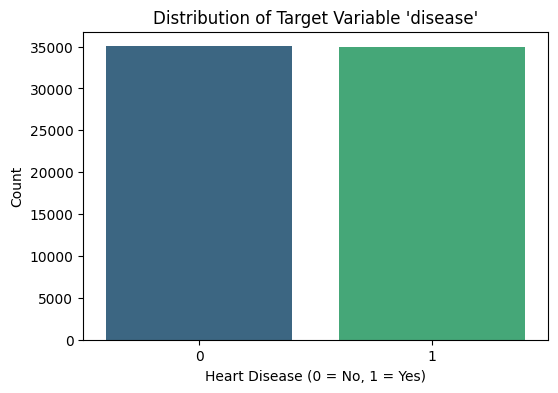

In [7]:
# Analyze target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='disease', data=data, palette='viridis')
plt.title("Distribution of Target Variable 'disease'")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

##### Target variable observations:
The target variable 'disease' (presence of heart disease) is balanced, with classes 0 and 1 appearing equally.

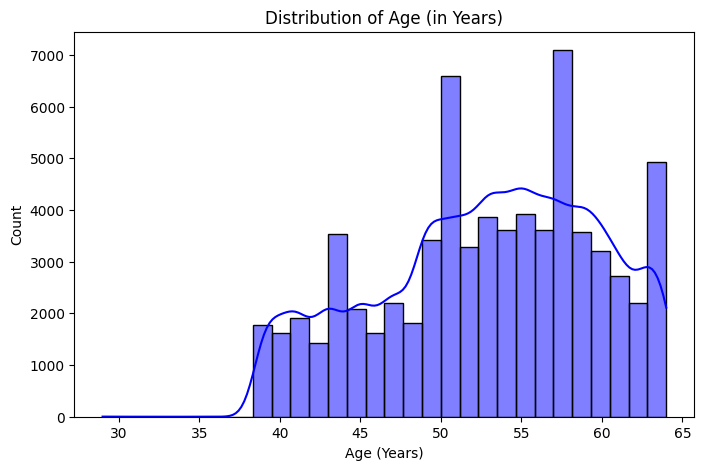

In [8]:
# Analyze the distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], bins=30, kde=True, color='blue')
plt.title("Distribution of Age (in Years)")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.show()

In [9]:
# List numerical and categorical features
numerical_features = ['age', 'ap_hi', 'ap_lo', 'weight', 'height']
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

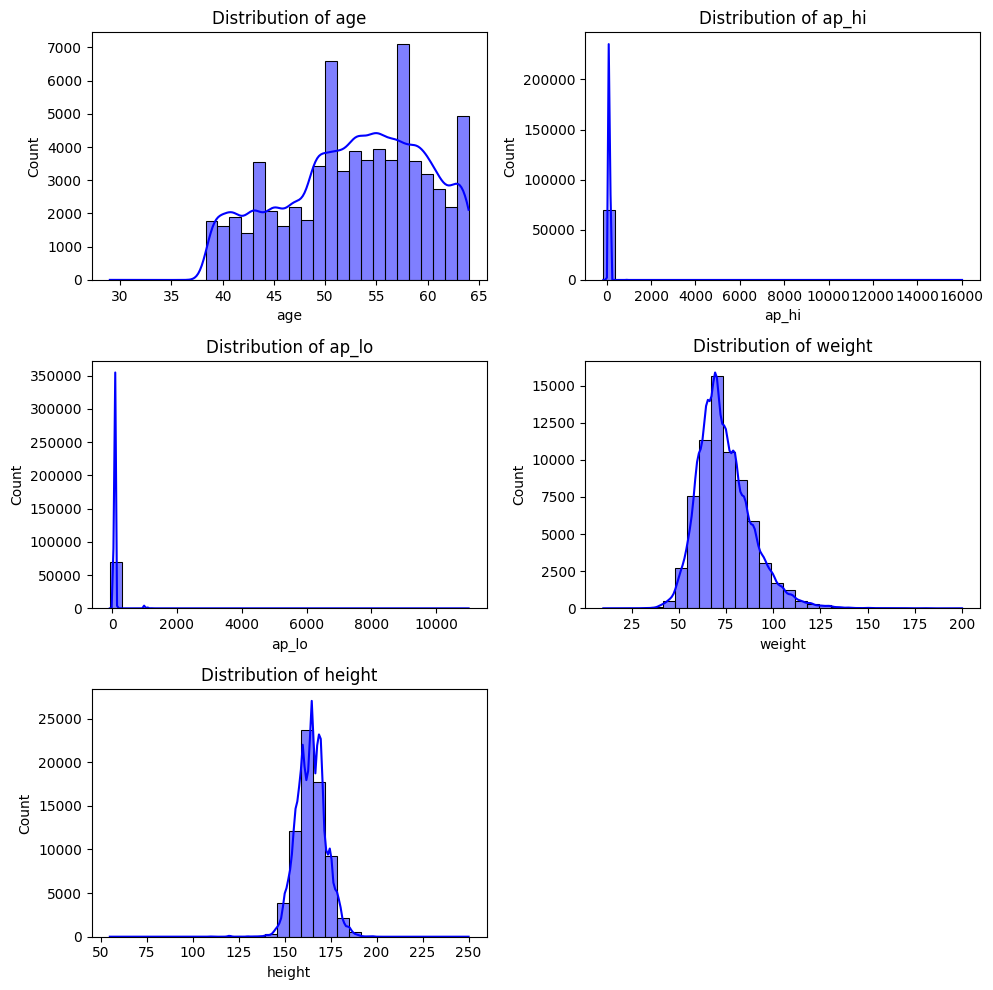

In [10]:
# Plot Numerical Features with Histograms and KDEs
plt.figure(figsize=(10, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data[feature], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Numeric features - Key insights
##### Age Distribution
Majority of individuals are aged between 45-60 years.
Slightly right-skewed distribution with fewer individuals under 40 and over 60.
##### Systolic Blood Pressure (ap_hi)
Extreme outliers skew the distribution heavily.
##### Diastolic Blood Pressure (ap_lo)
Presence of extreme outliers, similar to ap_hi.
##### Weight Distribution
Follows a roughly normal distribution with a slight right skew.
##### Height Distribution
Appears normally distributed, centered around 160-175 cm.
##### General Observations
Outliers in ap_hi and ap_lo require attention to prevent distortion in analysis.
Age, weight, and height variables are cleaner and ready for deeper exploration.

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Used to disable certain category of warnings
# The warnings do not affect the functionality or correctness of my code.
# Temporary fix to declutter and I plan to fix them later

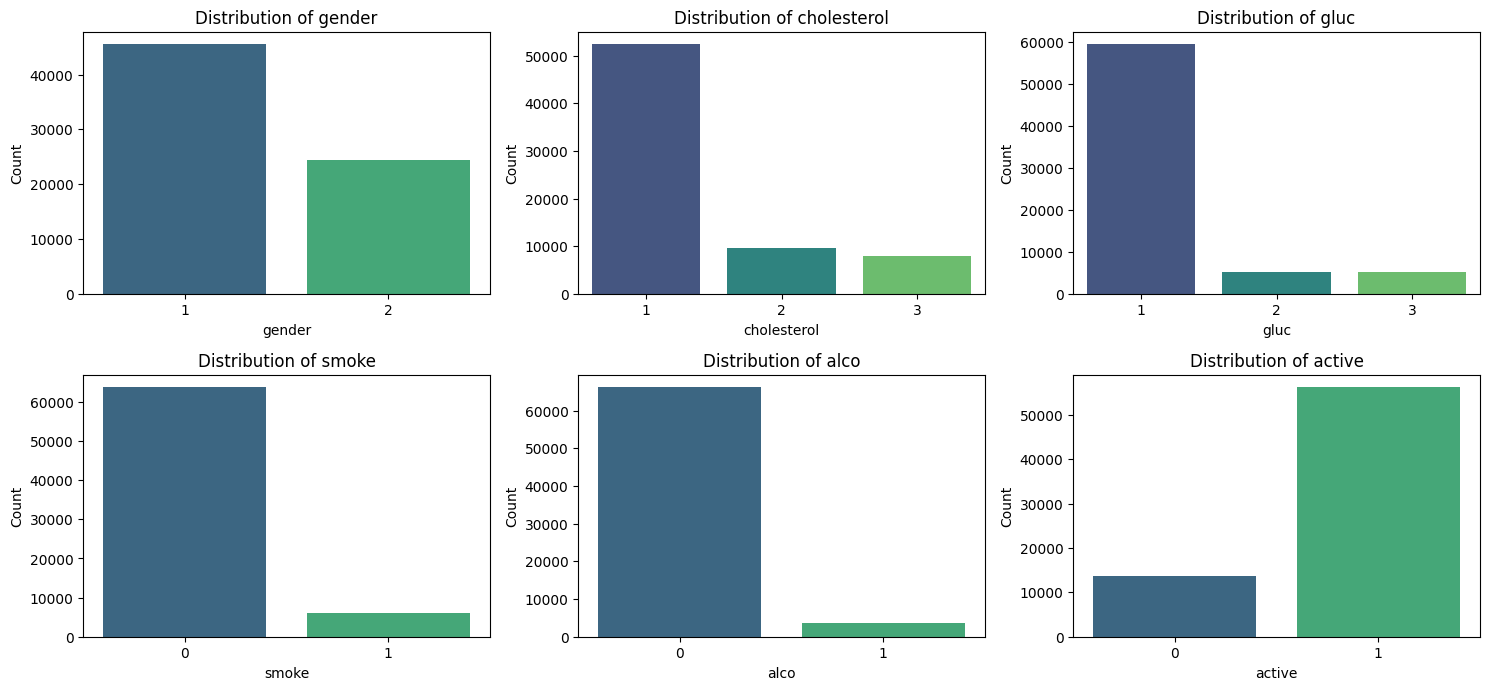

In [12]:
# Plot Categorical Features with Countplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=data[feature], palette="viridis")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Categorical Features - Key Insights
##### Gender distribution
There is an imbalance, with more males than females in the dataset.
##### Cholesterol distribution
Most individuals have normal cholesterol levels, but a notable minority have elevated levels.
##### Glucose level distribution
High glucose levels are relatively rare in the dataset.
##### Smoking status
A low prevalence of smokers in the dataset.
##### Alcohol consumption
Alcohol consumption appears uncommon in this population.
##### Physical activity 
Most individuals are physically active
##### Overall Observations
The dataset shows clear imbalances in categorical variables, with certain behaviors (e.g., smoking, drinking) and conditions (e.g., high glucose or cholesterol) being relatively uncommon.

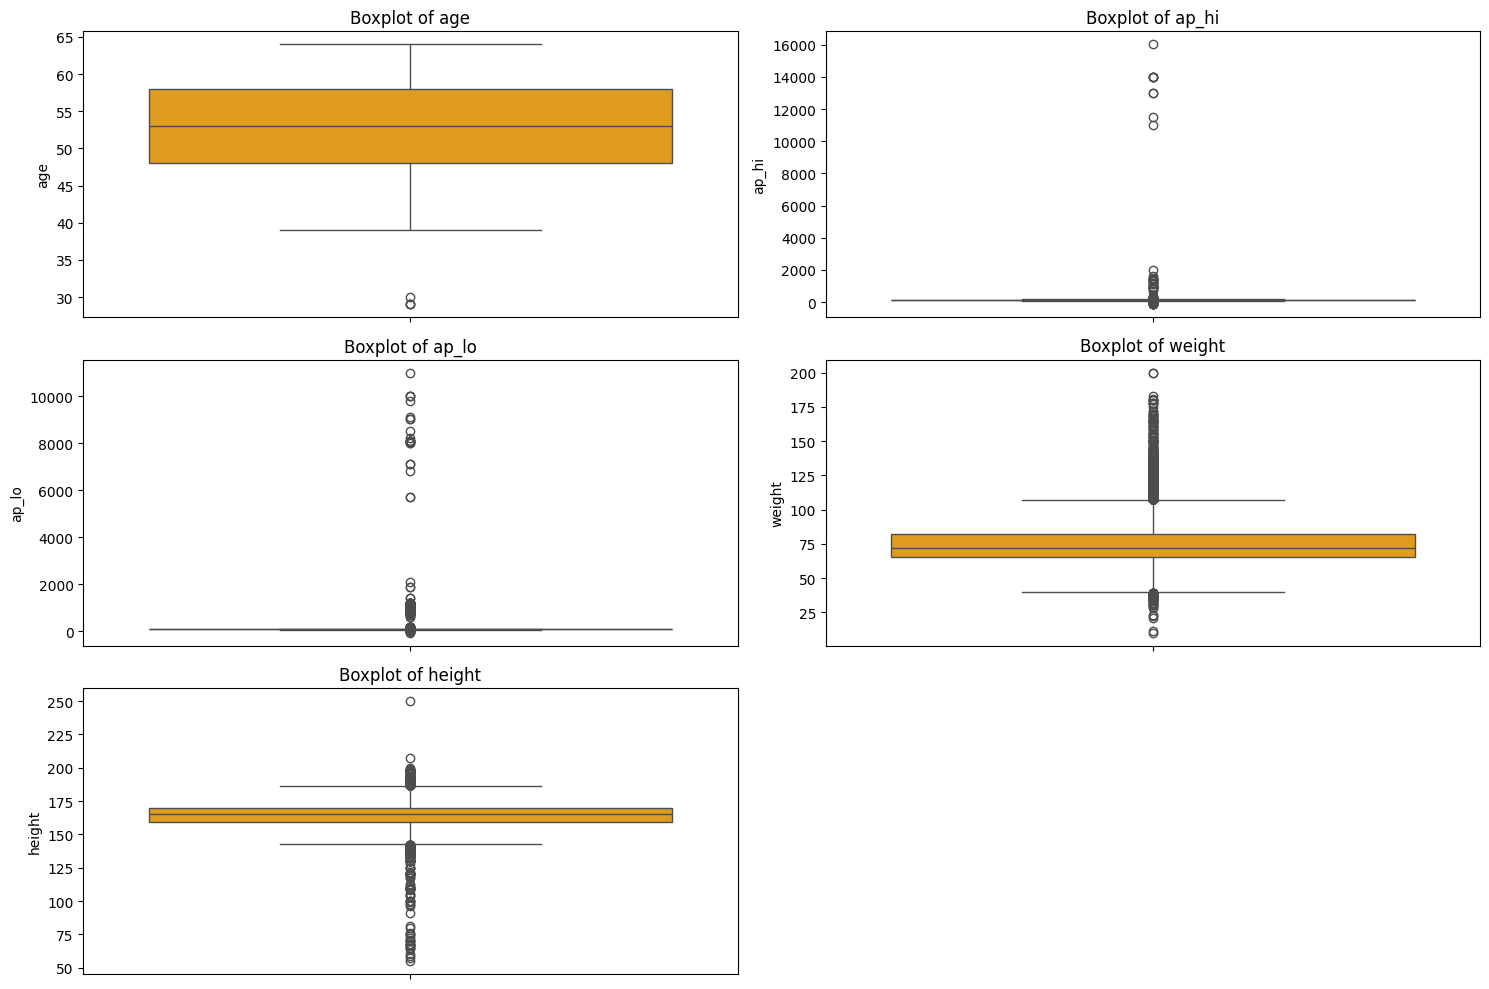

In [13]:
# Boxplots for Numerical Features (to show spread and outliers)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=data[feature], color='orange')
    plt.title(f"Boxplot of {feature}")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


#### Overall observations
##### Clean Variables: 
Age, weight, and height are relatively well-distributed with minimal outliers.
##### Outliers: 
Both ap_hi and ap_lo have numerous extreme outliers, suggesting data quality issues or incorrect entries that require resolution and cleaning.

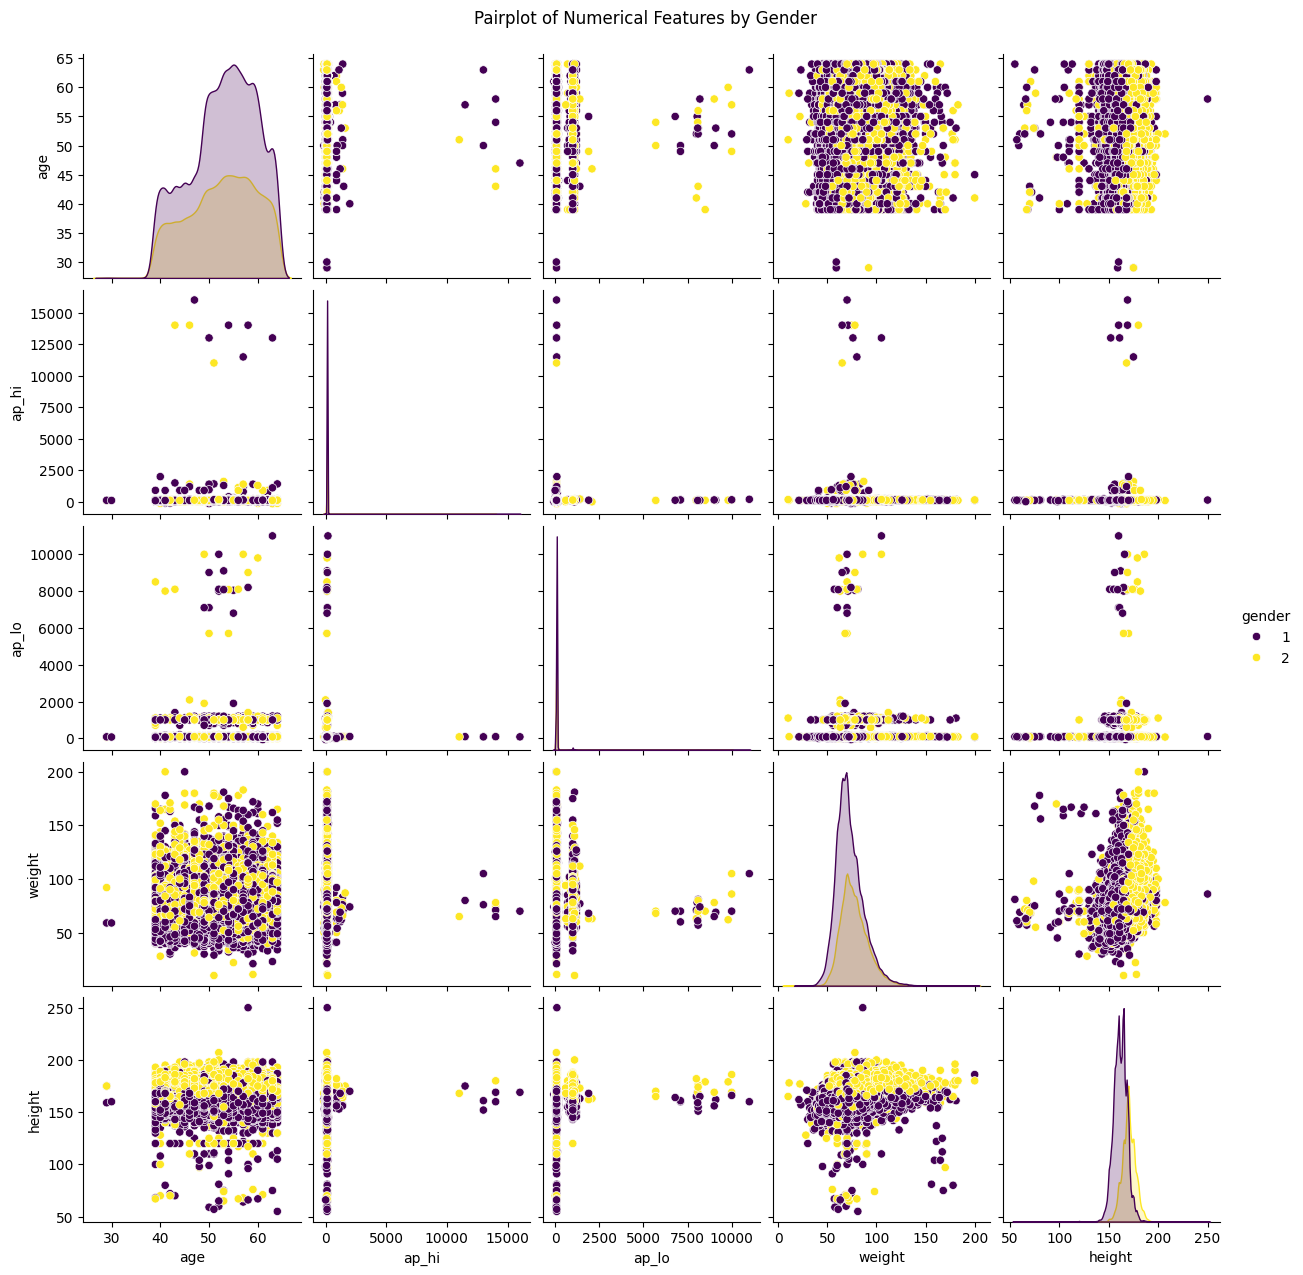

In [14]:
# Pairplot for Feature Relationships (e.g., age vs. ap_hi/ap_lo)
sns.pairplot(data, vars=numerical_features, hue="gender", diag_kind="kde", palette="viridis")
plt.suptitle("Pairplot of Numerical Features by Gender", y=1.02)
plt.show()

In [15]:
# Correlation matrix including encoded object data
# Encode categorical variables to numeric
data_encoded = data.copy()

In [16]:
# Drop non-informative columns for correlation matrix
data_encoded= data_encoded.drop(columns=['id', 'date','country'])

In [17]:
# Convert categorical/object columns to numeric using ordinal encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

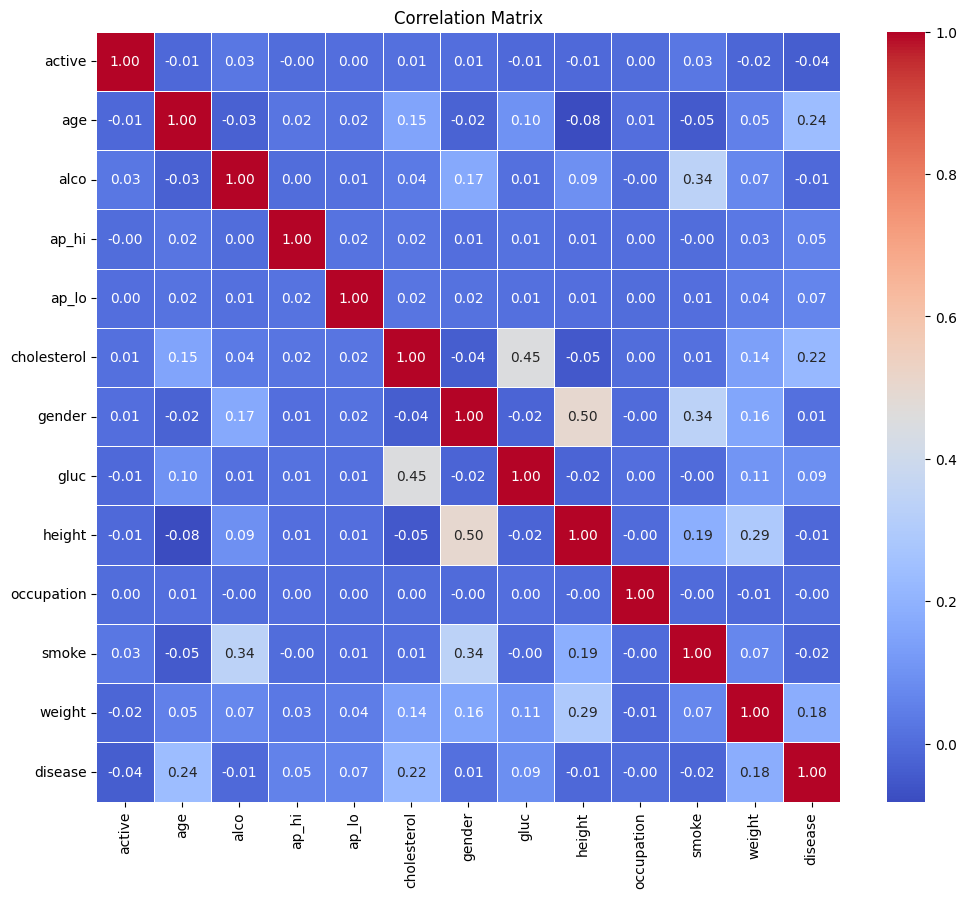

In [18]:
# Generate and visualize the correlation matrix
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

##### Correlation Matrix Key Observations:
Weak correlations between the features and 'disease', which indicates that advanced techniques like feature engineering or interaction terms might be necessary to improve predictive power.

In [19]:
# Set up the visual style
sns.set(style="whitegrid")

# Grouping data for comparisons
cholesterol_disease = data.groupby(['cholesterol', 'disease']).size().unstack()
smoking_disease = data.groupby(['smoke', 'disease']).size().unstack()

<Figure size 1200x600 with 0 Axes>

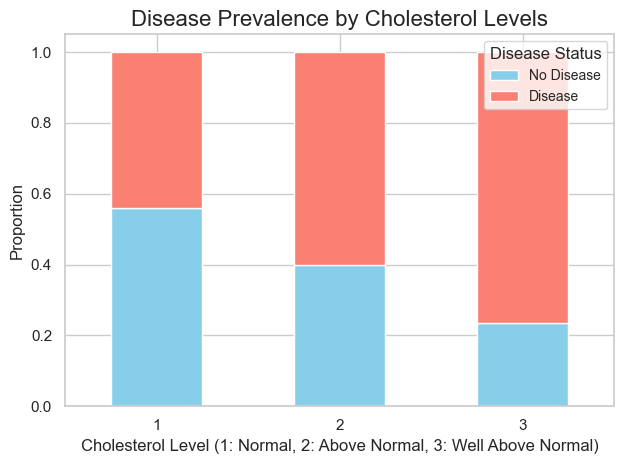

In [20]:
# Plotting disease prevalence by cholesterol levels
plt.figure(figsize=(12, 6))
cholesterol_disease_norm = cholesterol_disease.div(cholesterol_disease.sum(axis=1), axis=0)
cholesterol_disease_norm.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Disease Prevalence by Cholesterol Levels', fontsize=16)
plt.xlabel('Cholesterol Level (1: Normal, 2: Above Normal, 3: Well Above Normal)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(['No Disease', 'Disease'], title='Disease Status', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Disease Prevalence by Cholesterol Levels:

In the first chart, we observe how the prevalence of cardiovascular disease changes with cholesterol levels.

- Individuals with normal cholesterol levels (labeled as 1) have a significantly lower proportion of cardiovascular disease.
- However, as cholesterol levels move to above normal (2) and well above normal (3), the likelihood of disease sharply increases.
##### This trend highlights the critical role of managing cholesterol as part of preventive healthcare strategies. High cholesterol levels are a major risk factor that can be targeted for intervention.



<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

<Figure size 800x600 with 0 Axes>

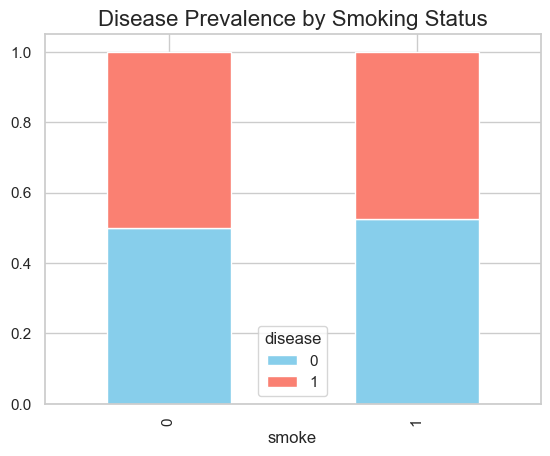

In [21]:
# Plotting disease prevalence by smoking status
plt.figure(figsize=(8, 6))
smoking_disease_norm = smoking_disease.div(smoking_disease.sum(axis=1), axis=0)
smoking_disease_norm.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Disease Prevalence by Smoking Status', fontsize=16)
plt.xlabel

##### Disease Prevalence by Smoking Status:
- The stacked bar chart depicts the disease prevalence among smokers and non-smokers.
##### Key Insights:
- Smokers have a higher proportion of cardiovascular disease compared to non-smokers.

In [22]:
# Re-encode gender
# Map gender values: 1 -> 0 (Female), 2 -> 1 (Male)
#data['gender'] = data['gender'].replace({1: 0, 2: 1})
# Safely encode gender values
# Check the unique values in the 'gender' column first to confirm encoding logic
print("Unique values in 'gender' column before encoding:", data['gender'].unique())

Unique values in 'gender' column before encoding: [2 1]


In [23]:
data.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,50,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,55,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,51,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,48,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,47,0,100,60,1,1,1,156,Architect,0,56.0,0


In [24]:
# Map gender: 1 (Female) -> 0, 2 (Male) -> 1
data['gender'] = data['gender'].map({1: 0, 2: 1})

# Check unique values after mapping
print("Unique values in 'gender' column after encoding:", data['gender'].unique())

Unique values in 'gender' column after encoding: [1 0]


In [25]:
data.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,50,0,110,80,1,1,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,55,0,140,90,3,0,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,51,0,130,70,3,0,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,48,0,150,100,1,1,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,47,0,100,60,1,0,1,156,Architect,0,56.0,0


In [26]:
# Check for duplicate rows
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Drop duplicates
#data = data.drop_duplicates()

Number of duplicate rows: 0


In [27]:
# Check the shape and basic info after cleaning
print("Dataset shape after cleaning:", data.shape)
print(data.info())

Dataset shape after cleaning: (70000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB
None


#### B. Data Preprocessing
- Handle outliers by capping or removing extreme values.
- Normalize or standardize numerical features.
- Encode categorical variables (country, occupation).
- Prepare the data for machine learning.

In [28]:
# Handle outliers: Remove or cap extreme values in numerical columns
# Define thresholds for each column
outlier_limits = {
    'ap_hi': (80, 240),  # Normal systolic BP range
    'ap_lo': (40, 140),  # Normal diastolic BP range
    'height': (100, 250),  # Realistic human height range in cm
    'weight': (30, 300)   # Realistic human weight range in kg
}

# Apply capping based on thresholds
for column, (lower, upper) in outlier_limits.items():
    data[column] = data[column].clip(lower=lower, upper=upper)

In [29]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'ap_hi', 'ap_lo', 'height', 'weight']
scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

In [30]:
# Create a mapping of countries to unique integers
country_mapping = {country: idx for idx, country in enumerate(data['country'].unique(), start=1)}

# Apply the mapping to encode the 'country' column
data['country_encoded'] = data['country'].map(country_mapping)

# Display the mapping for reference
print("Country Encoding Mapping:", country_mapping)

# Verify the encoding
data[['country', 'country_encoded']].drop_duplicates().sort_values(by='country_encoded')


Country Encoding Mapping: {'Indonesia': 1, 'Malaysia': 2, 'Singapore': 3, 'India': 4}


,country,country_encoded
0,Indonesia,1
1,Malaysia,2
3,Singapore,3
8,India,4


In [31]:
# Create a mapping of occupations to unique integers
occupation_mapping = {occupation: idx for idx, occupation in enumerate(data['occupation'].unique(), start=1)}

# Apply the mapping to encode the 'occupation' column
data['occupation_encoded'] = data['occupation'].map(occupation_mapping)

# Display the mapping for reference
print("Occupation Encoding Mapping:", occupation_mapping)

# Verify the encoding
data[['occupation', 'occupation_encoded']].drop_duplicates().sort_values(by='occupation_encoded')


Occupation Encoding Mapping: {'Architect': 1, 'Accountant': 2, 'Chef': 3, 'Lawyer': 4, 'Teacher': 5, 'Nurse': 6, 'Engineer': 7, 'Doctor': 8, 'Others': 9}


,occupation,occupation_encoded
0,Architect,1
1,Accountant,2
2,Chef,3
3,Lawyer,4
5,Teacher,5
13,Nurse,6
15,Engineer,7
20,Doctor,8
22,Others,9


In [32]:
data.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,country_encoded,occupation_encoded
0,03-05-2021,Indonesia,0,1,50,0,110,80,1,1,1,168,Architect,0,62.0,0,1,1
1,05-08-2021,Malaysia,1,1,55,0,140,90,3,0,1,156,Accountant,0,85.0,1,2,2
2,13-11-2022,Indonesia,2,0,51,0,130,70,3,0,1,165,Chef,0,64.0,1,1,3
3,31-10-2018,Singapore,3,1,48,0,150,100,1,1,1,169,Lawyer,0,82.0,1,3,4
4,25-09-2020,Singapore,4,0,47,0,100,60,1,0,1,156,Architect,0,56.0,0,3,1


# SUPERVISED MACHINE LEARNING

### 5. Building and Evaluating Classifier Models

In [33]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

#### A. Split the Data
- Split the dataset into training and test sets to evaluate the models.
- Define the target variable 'disease' and features.

In [34]:
# Define features (X) and target (y)
X = data.drop(columns=['disease', 'country', 'occupation','date','id'])  # Drop target and raw categorical columns
y = data['disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the resulting dataset shapes
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)


Training Features Shape: (56000, 13)
Test Features Shape: (14000, 13)
Training Labels Shape: (56000,)
Test Labels Shape: (14000,)


In [35]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Define a function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        # Store results
        results.append({
            'Model': name,
            'Accuracy': acc,
            'F1-Score': f1,
            'Precision': precision,
            'Recall': recall,
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        })
    return pd.DataFrame(results)

# Define models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear',max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_jobs=-2,random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Train and evaluate models
results_df = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Display results table
print("Model Evaluation Results:")
print(results_df[['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall']])

Model Evaluation Results:
                 Model  Accuracy  F1-Score  Precision    Recall
0  Logistic Regression  0.723571  0.708935   0.748095  0.673671
1        Decision Tree  0.631714  0.632711   0.630645  0.634791
2        Random Forest  0.723857  0.717439   0.734071  0.701544
3                  SVM  0.724214  0.698336   0.770119  0.638794


#### Model Results - Key Insights
##### 1. Logistic Regression:
Logistic Regression performs well, balancing precision and recall, making it a good choice when false positives are less tolerable.
##### 2. Decision Tree
The Decision Tree struggles compared to other models, likely due to overfitting or insufficient parameter tuning. It might benefit from regularization or pruning.
##### 3. Random Forest
Random Forest offers the best balance across metrics, with strong performance in recall and overall robustness. It could be a top choice for this dataset, particularly in scenarios where false negatives are a concern.
##### 4. SVM
SVM is ideal if false positives are highly undesirable, as it has the highest precision. However, its recall is the lowest, meaning it may miss more true cases compared to other models.

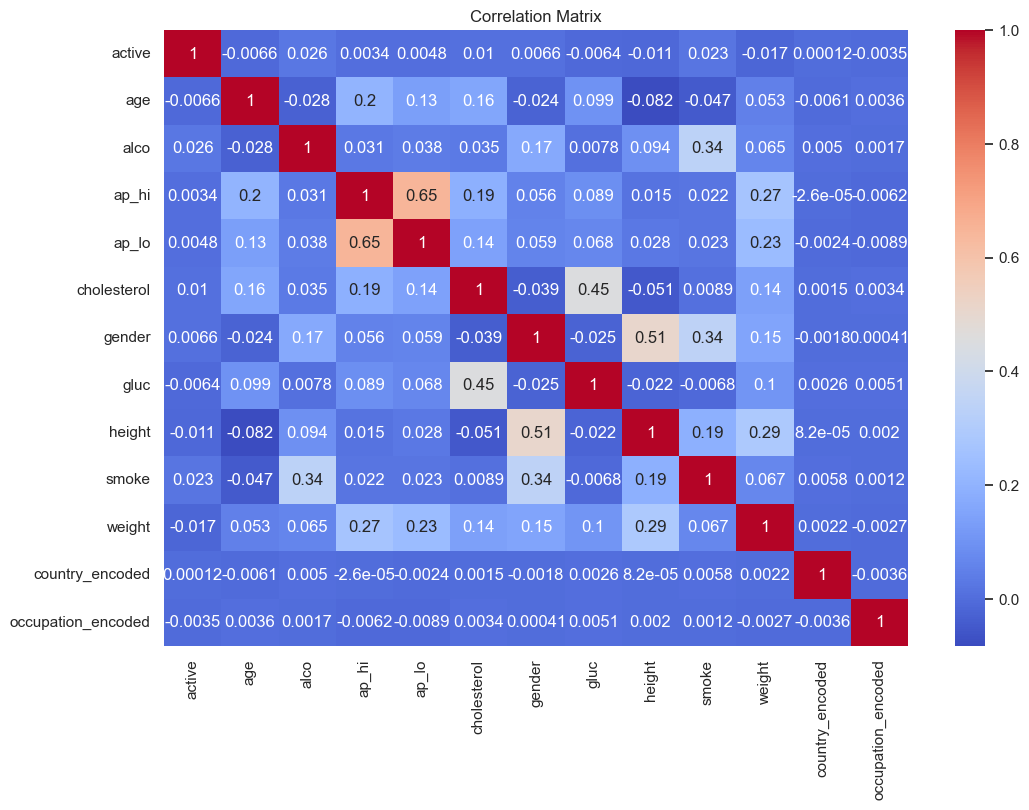

In [37]:
# Check correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_train, columns=X_train.columns).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


<Figure size 1000x600 with 0 Axes>

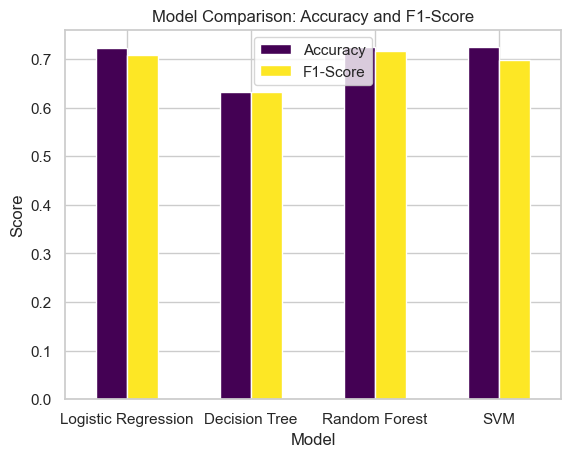

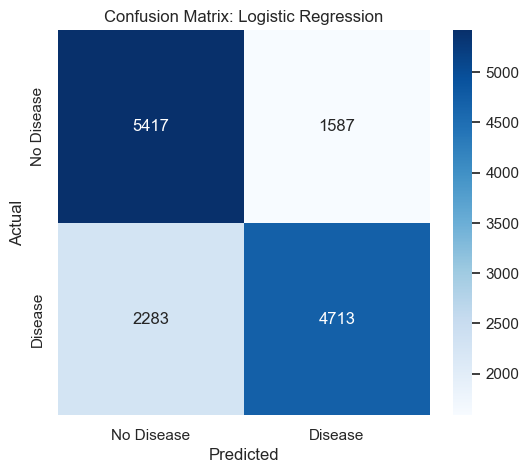

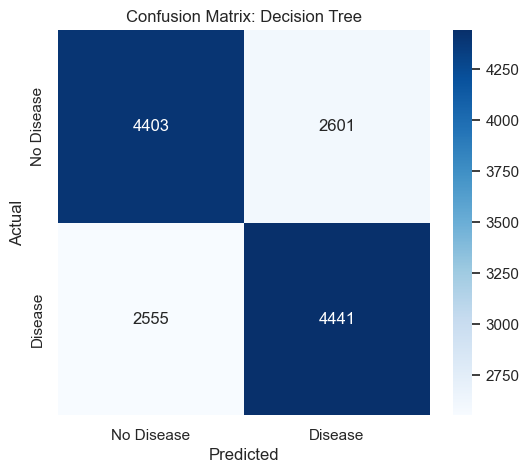

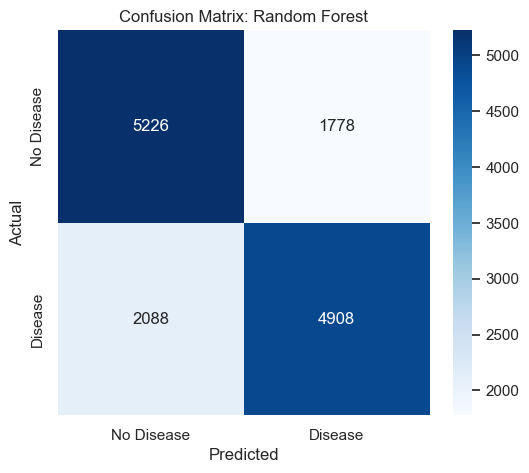

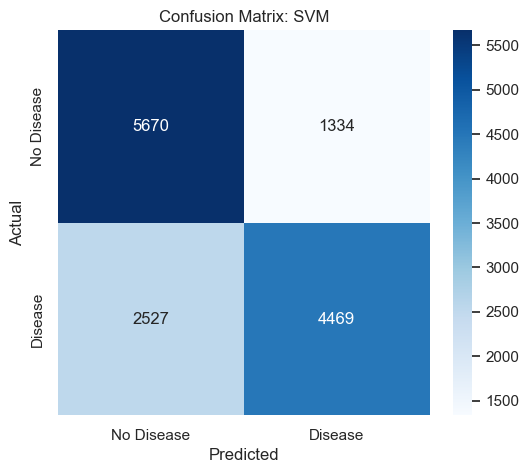

In [45]:
# Plot Accuracy and F1-Score
plt.figure(figsize=(10, 6))
results_df.set_index('Model')[['Accuracy', 'F1-Score']].plot(kind='bar', rot=0, colormap='viridis')
plt.title('Model Comparison: Accuracy and F1-Score')
plt.ylabel('Score')
plt.show()

# Visualize Confusion Matrices
for index, row in results_df.iterrows():
    plt.figure(figsize=(6, 5))
    sns.heatmap(row['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(f"Confusion Matrix: {row['Model']}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### Key Insights:
##### Model Performance Comparison:

- Logistic Regression and SVM show similar performance in terms of accuracy and F1-score, with a slight edge for SVM.
- Random Forest and Decision Tree perform slightly lower than the other two models, particularly with Decision Tree showing the lowest F1-score.

#### Confusion Matrix Observations:

##### Logistic Regression: 
High true negatives (No Disease correctly predicted) but a relatively high number of false positives and false negatives.
##### Decision Tree: 
Similar trends but with more false positives, affecting precision.
##### Random Forest: 
A more balanced approach than Decision Tree with fewer misclassifications.
##### SVM: 
Performs well across both disease prediction and non-disease prediction, with a solid distribution of true positives and true negatives.

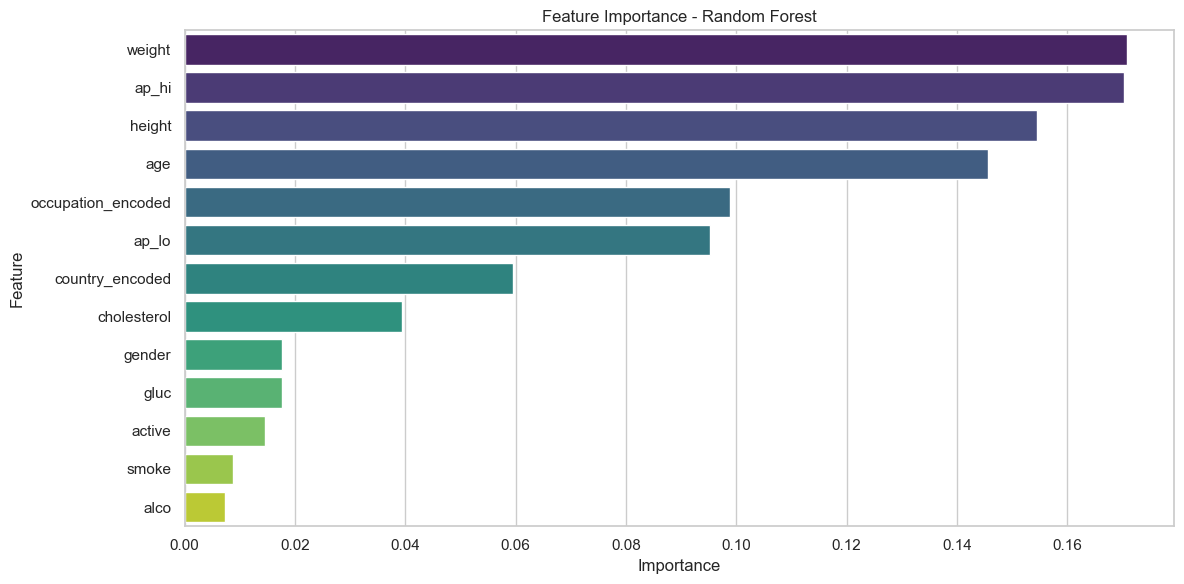

In [39]:
# Feature Importance from Random Forest
importances = models['Random Forest'].feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Visualize Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [40]:
# Optional: Drop less important features (example)
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature']
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

In [41]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Grid Search
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Logistic Regression:", log_reg_grid.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}


In [42]:
# Hyperparameter Grid
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
dt = DecisionTreeClassifier(random_state=42)

# Grid Search
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='f1', verbose=1, n_jobs=-4) #Used n_jobs=-4 to reduce system resource consumption
dt_grid.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Decision Tree:", dt_grid.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}


In [43]:
# Hyperparameter Grid
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)

# Grid Search
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', verbose=1, n_jobs=-4) #Used n_jobs=-4 to reduce system resource consumption
rf_grid.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:", rf_grid.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [44]:
# Hyperparameter Grid
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm = SVC(random_state=42)

# Grid Search
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='f1', verbose=1, n_jobs=-4) #Used n_jobs=-4 to reduce system resource consumption
svm_grid.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for SVM:", svm_grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: 

In [ ]:
# Best parameters from hyperparameter tuning
best_params = {
    'LogisticRegression': {'solver': 'lbfgs'', 'C': 1, 'max_iter': 2000},
    'DecisionTree': {'max_depth': 10, 'criterion': 'entropy'},
    'RandomForest': {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 10, 'random_state': 42},
    'SVM': {'C': 1, 'kernel': 'linear'}
}

# Define the models with best parameters
models = {
    'Logistic Regression': LogisticRegression(**best_params['LogisticRegression']),
    'Decision Tree': DecisionTreeClassifier(**best_params['DecisionTree']),
    'Random Forest': RandomForestClassifier(**best_params['RandomForest']),
    'SVM': SVM(**best_params['SVM'])
}

In [ ]:
# Train and evaluate models
results = []

for name, model in models.items():
    print(f"Training {name}...")
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    
    # Append results for comparison
    results.append({'Model': name, 'Accuracy': accuracy})
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
# Summary of Results
results_df = pd.DataFrame(results)
print("Summary of Model Results:")
print(results_df)

# Visualize Results
plt.figure(figsize=(8, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()